*Using Pauli gates as encoding*

In [1]:
import QuantumReservoirpy as QRP

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt


In [7]:
res = QRP.QReservoir(qubits=4, layers=[
    # QRP.Layers.H(1),
    # QRP.Layers.Warmup(5),
    QRP.Layers.CgateTimeseries(measure_qubits=[0, 1], control_qubits=[3], target_qubits=[0, 1, 2]),
    # QRP.Layers.Predict(num_predictions=10)
])


model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
expr = QRP.Experiment(reservoir=res, model=model)

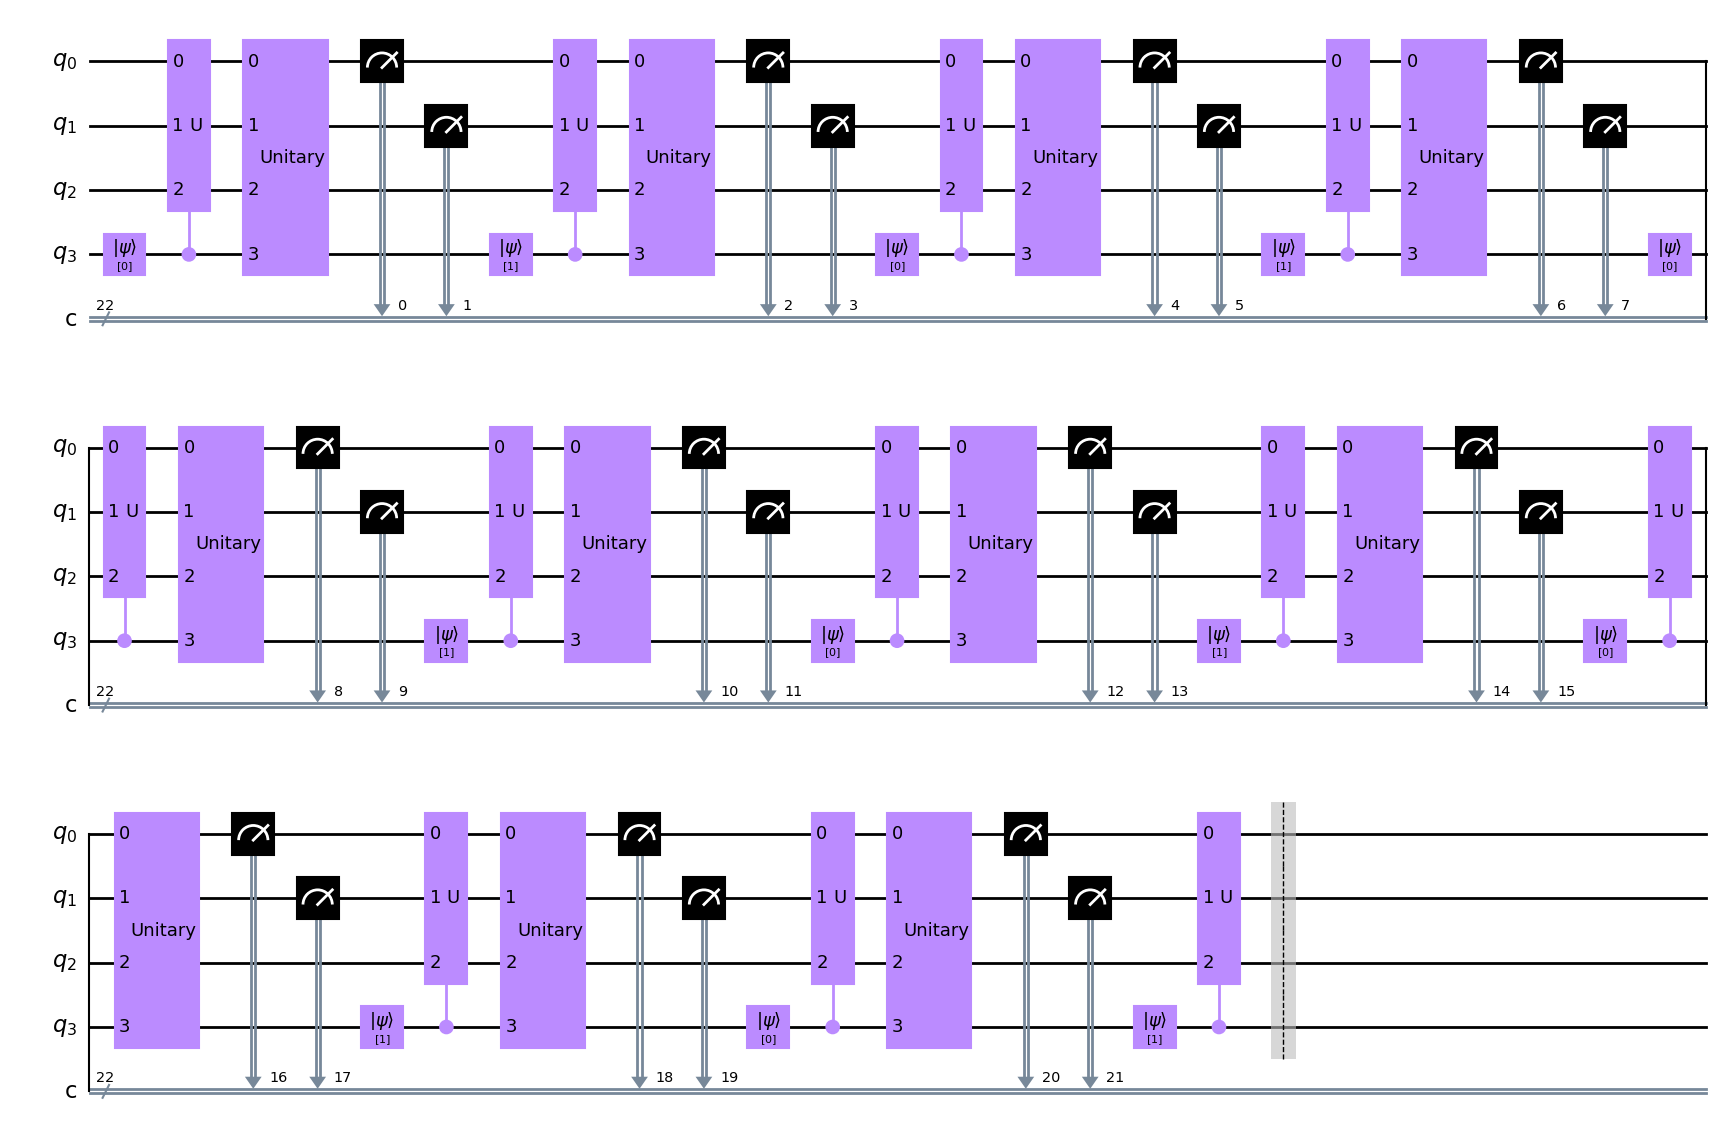

In [8]:
circ = res.circuit(timeseries=[0, 1, 0, 1] * 3)
circ.draw('mpl')

In [4]:
timeseries = [0, 1, 0, 1, 1] * 20
expr.run(timeseries, shots=10000, warmup=25)
score = expr.get_score()
print(f'Result SVC = {round(100*score, 2)}%')

Result SVC = 80.0%


Text(0.5, 0.98, 'Result SVC = 80.0%')

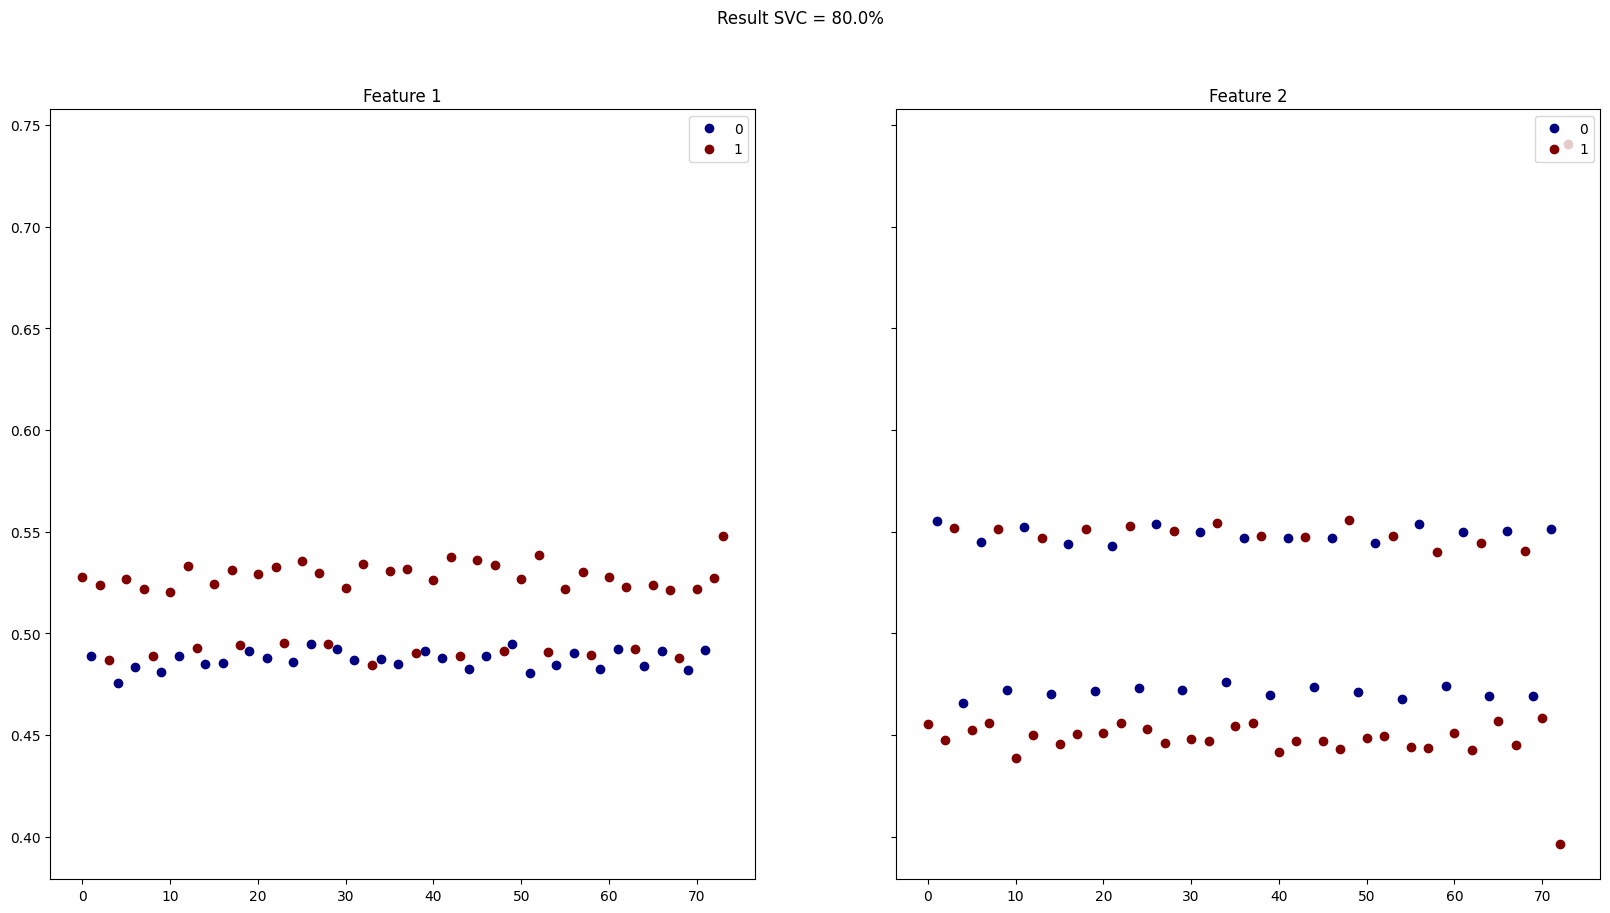

In [5]:
fig, ax = expr.get_feature_plot()
fig.suptitle(f'Result SVC = {round(100*score, 2)}%')
# print(f'Predictions made by model: {expr.get_predictions()}')